In [1]:
import sys, os
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet")
import sd_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'sd_unet_50ep_1024_fG_wo_slice'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-16 03:21:35.838359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 03:21:35.838419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 03:21:35.859151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 03:21:35.902314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 03:21:36.633100: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,}

# Create augmentation
# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = sd_unet.SD_UNet(INPUT_SHAPE)
model.summary()

2024-02-16 03:21:54.864793: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-16 03:21:54.947694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-16 03:21:54.947893: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 1024, 1024, 8)        80        ['input_1[0][0]']             
                                                                                                  
 drop_block2d (DropBlock2D)  (None, 1024, 1024, 8)        2097152   ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 1024, 1024, 8)        0         ['drop_block2d[0][0]']        
                                                                                              

In [ ]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)

In [4]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_50ep_1024_fG_wo_slice.tf'

test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.4672 - sensitivity: 0.3885 - specificity: 0.9887 - accuracy: 0.9469 - f1_score: 0.4780 - iou: 0.3257
2번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.3429 - sensitivity: 0.5784 - specificity: 0.9811 - accuracy: 0.9533 - f1_score: 0.6135 - iou: 0.4523
3번째 epoch 결과


233/233 [==============================] - 16s 68ms/step - loss: 0.3104 - sensitivity: 0.6589 - specificity: 0.9758 - accuracy: 0.9541 - f1_score: 0.6505 - iou: 0.4917
4번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2949 - sensitivity: 0.7651 - specificity: 0.9624 - accuracy: 0.9490 - f1_score: 0.6667 - iou: 0.5106
5번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2797 - sensitivity: 0.7658 - specificity: 0.9667 - accuracy: 0.9530 - f1_score: 0.6833 - iou: 0.5297
6번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2665 - sensitivity: 0.7295 - specificity: 0.9752 - accuracy: 0.9583 - f1_score: 0.6960 - iou: 0.5441
7번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2602 - sensitivity: 0.7703 - specificity: 0.9708 - accuracy: 0.9569 - f1_score: 0.7018 - iou: 0.5510
8번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2602 - sensitivity: 0.7822 - specificity: 0.9697 - accuracy: 0.9568 - f1_score: 0.7047 - iou: 0.5555
9번째 epoch 결과


233/233 [==============================] - 16s 68ms/step - loss: 0.2472 - sensitivity: 0.7747 - specificity: 0.9734 - accuracy: 0.9596 - f1_score: 0.7161 - iou: 0.5688
10번째 epoch 결과


233/233 [==============================] - 16s 68ms/step - loss: 0.2495 - sensitivity: 0.7816 - specificity: 0.9724 - accuracy: 0.9593 - f1_score: 0.7159 - iou: 0.5693
11번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2423 - sensitivity: 0.7819 - specificity: 0.9738 - accuracy: 0.9606 - f1_score: 0.7221 - iou: 0.5768
12번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2415 - sensitivity: 0.7681 - specificity: 0.9761 - accuracy: 0.9618 - f1_score: 0.7240 - iou: 0.5788
13번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2381 - sensitivity: 0.7970 - specificity: 0.9729 - accuracy: 0.9607 - f1_score: 0.7265 - iou: 0.5824
14번째 epoch 결과


233/233 [==============================] - 15s 61ms/step - loss: 0.2398 - sensitivity: 0.7985 - specificity: 0.9725 - accuracy: 0.9605 - f1_score: 0.7261 - iou: 0.5824
15번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2324 - sensitivity: 0.7932 - specificity: 0.9747 - accuracy: 0.9620 - f1_score: 0.7324 - iou: 0.5895
16번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2329 - sensitivity: 0.8067 - specificity: 0.9729 - accuracy: 0.9613 - f1_score: 0.7324 - iou: 0.5902
17번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2455 - sensitivity: 0.8356 - specificity: 0.9663 - accuracy: 0.9573 - f1_score: 0.7212 - iou: 0.5767
18번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2353 - sensitivity: 0.8290 - specificity: 0.9695 - accuracy: 0.9598 - f1_score: 0.7308 - iou: 0.5887
19번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2324 - sensitivity: 0.8185 - specificity: 0.9717 - accuracy: 0.9611 - f1_score: 0.7337 - iou: 0.5924
20번째 epoch 결과


233/233 [==============================] - 16s 67ms/step - loss: 0.2296 - sensitivity: 0.8095 - specificity: 0.9735 - accuracy: 0.9622 - f1_score: 0.7369 - iou: 0.5966
21번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2243 - sensitivity: 0.7971 - specificity: 0.9761 - accuracy: 0.9636 - f1_score: 0.7409 - iou: 0.6013
22번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2207 - sensitivity: 0.7941 - specificity: 0.9771 - accuracy: 0.9643 - f1_score: 0.7438 - iou: 0.6042
23번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2249 - sensitivity: 0.8154 - specificity: 0.9737 - accuracy: 0.9627 - f1_score: 0.7412 - iou: 0.6021
24번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2248 - sensitivity: 0.8090 - specificity: 0.9745 - accuracy: 0.9631 - f1_score: 0.7415 - iou: 0.6027
25번째 epoch 결과


233/233 [==============================] - 16s 68ms/step - loss: 0.2220 - sensitivity: 0.8107 - specificity: 0.9750 - accuracy: 0.9636 - f1_score: 0.7438 - iou: 0.6055
26번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2363 - sensitivity: 0.8355 - specificity: 0.9686 - accuracy: 0.9593 - f1_score: 0.7294 - iou: 0.5869
27번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2201 - sensitivity: 0.8051 - specificity: 0.9761 - accuracy: 0.9643 - f1_score: 0.7457 - iou: 0.6080
28번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2238 - sensitivity: 0.8143 - specificity: 0.9742 - accuracy: 0.9631 - f1_score: 0.7424 - iou: 0.6038
29번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2218 - sensitivity: 0.8234 - specificity: 0.9735 - accuracy: 0.9630 - f1_score: 0.7445 - iou: 0.6067
30번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2219 - sensitivity: 0.8309 - specificity: 0.9726 - accuracy: 0.9627 - f1_score: 0.7445 - iou: 0.6065
31번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2202 - sensitivity: 0.8239 - specificity: 0.9739 - accuracy: 0.9635 - f1_score: 0.7466 - iou: 0.6092
32번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2202 - sensitivity: 0.8255 - specificity: 0.9736 - accuracy: 0.9633 - f1_score: 0.7464 - iou: 0.6093
33번째 epoch 결과


233/233 [==============================] - 16s 67ms/step - loss: 0.2140 - sensitivity: 0.7956 - specificity: 0.9787 - accuracy: 0.9659 - f1_score: 0.7521 - iou: 0.6160
34번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2214 - sensitivity: 0.8351 - specificity: 0.9722 - accuracy: 0.9626 - f1_score: 0.7449 - iou: 0.6070
35번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2185 - sensitivity: 0.8245 - specificity: 0.9742 - accuracy: 0.9637 - f1_score: 0.7476 - iou: 0.6105
36번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2253 - sensitivity: 0.8422 - specificity: 0.9704 - accuracy: 0.9614 - f1_score: 0.7415 - iou: 0.6033
37번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2130 - sensitivity: 0.8105 - specificity: 0.9771 - accuracy: 0.9655 - f1_score: 0.7532 - iou: 0.6176
38번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2136 - sensitivity: 0.8152 - specificity: 0.9764 - accuracy: 0.9651 - f1_score: 0.7526 - iou: 0.6166
39번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2169 - sensitivity: 0.8266 - specificity: 0.9742 - accuracy: 0.9639 - f1_score: 0.7489 - iou: 0.6120
40번째 epoch 결과


233/233 [==============================] - 15s 62ms/step - loss: 0.2098 - sensitivity: 0.7992 - specificity: 0.9790 - accuracy: 0.9664 - f1_score: 0.7558 - iou: 0.6205
41번째 epoch 결과


233/233 [==============================] - 16s 68ms/step - loss: 0.2107 - sensitivity: 0.7909 - specificity: 0.9797 - accuracy: 0.9665 - f1_score: 0.7537 - iou: 0.6175
42번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2087 - sensitivity: 0.7933 - specificity: 0.9799 - accuracy: 0.9668 - f1_score: 0.7566 - iou: 0.6215
43번째 epoch 결과


233/233 [==============================] - 16s 69ms/step - loss: 0.2097 - sensitivity: 0.8021 - specificity: 0.9787 - accuracy: 0.9664 - f1_score: 0.7561 - iou: 0.6214
44번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2092 - sensitivity: 0.8063 - specificity: 0.9784 - accuracy: 0.9664 - f1_score: 0.7571 - iou: 0.6229
45번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2125 - sensitivity: 0.8186 - specificity: 0.9762 - accuracy: 0.9651 - f1_score: 0.7538 - iou: 0.6190
46번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2110 - sensitivity: 0.8201 - specificity: 0.9764 - accuracy: 0.9655 - f1_score: 0.7557 - iou: 0.6212
47번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2135 - sensitivity: 0.8315 - specificity: 0.9744 - accuracy: 0.9644 - f1_score: 0.7531 - iou: 0.6180
48번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2101 - sensitivity: 0.8233 - specificity: 0.9762 - accuracy: 0.9655 - f1_score: 0.7566 - iou: 0.6226
49번째 epoch 결과


233/233 [==============================] - 15s 64ms/step - loss: 0.2071 - sensitivity: 0.8054 - specificity: 0.9789 - accuracy: 0.9668 - f1_score: 0.7591 - iou: 0.6250
50번째 epoch 결과


233/233 [==============================] - 15s 63ms/step - loss: 0.2105 - sensitivity: 0.8175 - specificity: 0.9769 - accuracy: 0.9657 - f1_score: 0.7563 - iou: 0.6219


In [5]:
import pickle
# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'sd_unet_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [6]:
file_path = 'sd_unet_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

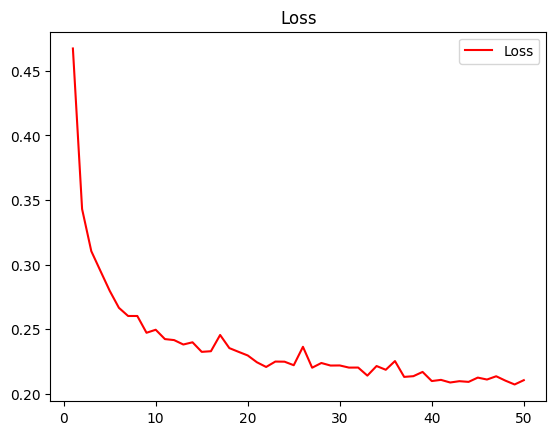

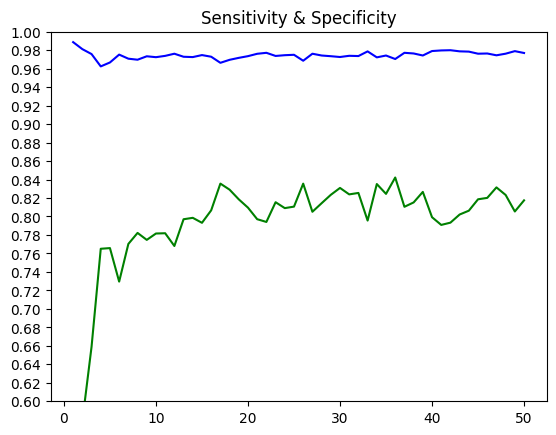

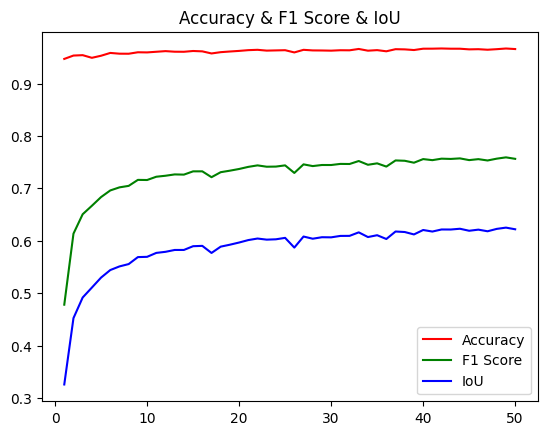

<Figure size 640x480 with 0 Axes>

In [7]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)